
# Tarefa AAG04 - Distribuições de Probabilidade

Este notebook utiliza os dados de treinamento e validação de um autoencoder, fornecidos em um arquivo CSV, para criar e visualizar distribuições de probabilidade. O CSV contém informações sobre as perdas de treinamento (`train_loss`) e validação (`val_loss`) ao longo das épocas.

---

## Estrutura do CSV

O arquivo contém as seguintes colunas:
- `epoch`: Número da época.
- `train_loss`: Perda de treinamento em cada época.
- `val_loss`: Perda de validação em cada época.

Os dados seerão utilizdos para gerar distribuições de probabilidade.

### Importando os dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli, binom, poisson, geom, uniform, expon, norm

# Carregar os dados
csv_path = "01_janeiro_loss_history.csv"
loss_data = pd.read_csv(csv_path)

# Exibir as 5 primeiras linhas do dataset
print(loss_data.head())

   epoch  train_loss  val_loss
0      1    0.316289  0.294816
1      2    0.292840  0.291973
2      3    0.291479  0.291339
3      4    0.291027  0.290994
4      5    0.290723  0.290706



## 1. Distribuição Bernoulli
Vamos criar uma distribuição Bernoulli para modelar se a perda de validação (`val_loss`) em uma época está acima ou abaixo da mediana das perdas de validação.



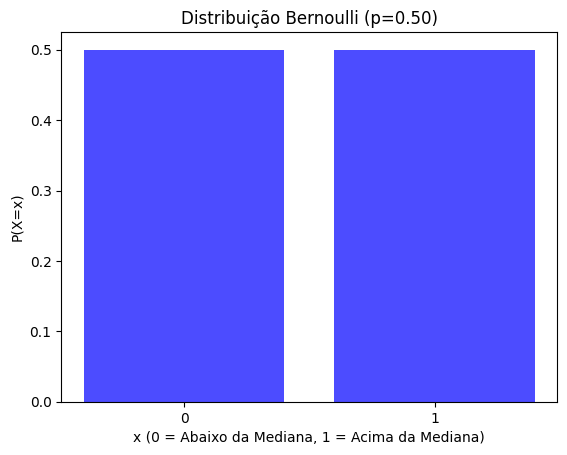

In [2]:
# Determinar os valores da mediana
median_val_loss = np.median(loss_data['val_loss'])

# Criar variável binária: 1 se val_loss > mediana, 0 caso contrário
bernoulli_data = (loss_data['val_loss'] > median_val_loss).astype(int)

# Parâmetro p
p = bernoulli_data.mean()

# Gráfico
x = [0, 1]
probs = bernoulli.pmf(x, p)

plt.bar(x, probs, color='blue', alpha=0.7)
plt.title(f'Distribuição Bernoulli (p={p:.2f})')
plt.xlabel('x (0 = Abaixo da Mediana, 1 = Acima da Mediana)')
plt.ylabel('P(X=x)')
plt.xticks(x)
plt.show()



## 2. Distribuição Binomial
Vamos criar uma distribuição Binomial para modelar o número de épocas em que a perda de validação (`val_loss`) está acima da mediana em subconjuntos de 10 épocas.



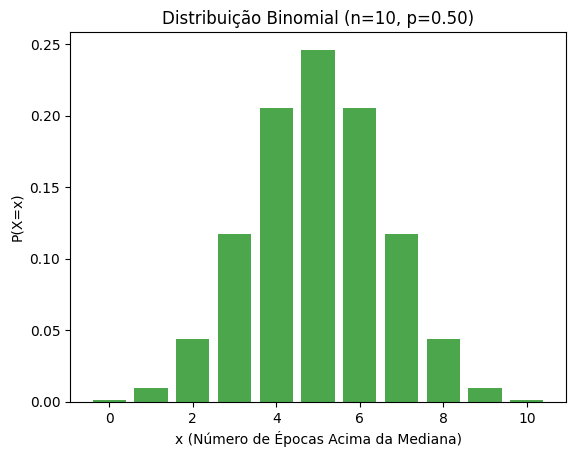

In [3]:
# Agrupar em subconjuntos de 10 épocas
n = 10
val_loss_above_median = (loss_data['val_loss'] > median_val_loss).astype(int)
grouped = val_loss_above_median.groupby(loss_data['epoch'] // n).sum()

# Parâmetro p
p = val_loss_above_median.mean()

# Gráfico
x = np.arange(0, n + 1)
probs = binom.pmf(x, n, p)

plt.bar(x, probs, color='green', alpha=0.7)
plt.title(f'Distribuição Binomial (n={n}, p={p:.2f})')
plt.xlabel('x (Número de Épocas Acima da Mediana)')
plt.ylabel('P(X=x)')
plt.show()

## 3. Distribuição de Poisson
Modelar o número de épocas consecutivas em que a perda de validação (`val_loss`) está abaixo da mediana.



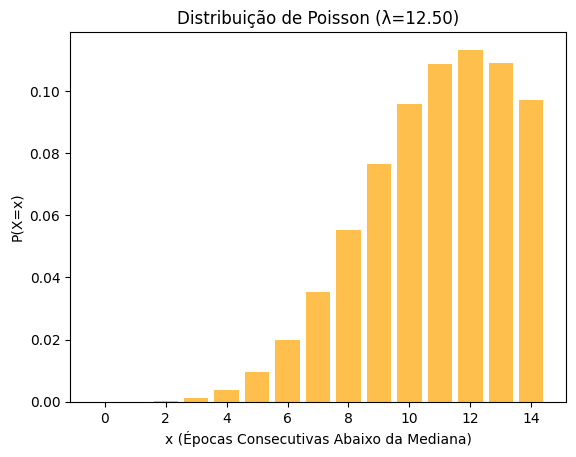

In [4]:
# Contar épocas consecutivas abaixo da mediana
consecutive_below = (loss_data['val_loss'] <= median_val_loss).astype(int)
runs = consecutive_below.groupby((consecutive_below != consecutive_below.shift()).cumsum()).transform('sum')

# Taxa lambda
lambda_ = runs.mean()

# Gráfico
x = np.arange(0, 15)
probs = poisson.pmf(x, lambda_)

plt.bar(x, probs, color='orange', alpha=0.7)
plt.title(f'Distribuição de Poisson (λ={lambda_:.2f})')
plt.xlabel('x (Épocas Consecutivas Abaixo da Mediana)')
plt.ylabel('P(X=x)')
plt.show()

## 4. Distribuição Geométrica
Modelar o número de épocas até a primeira perda de validação (`val_loss`) acima da mediana.



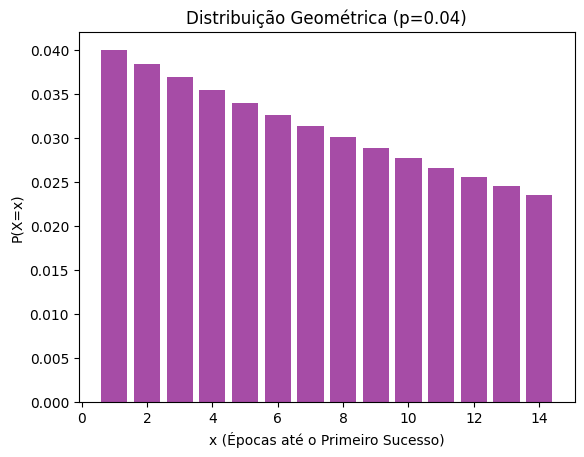

In [5]:
# Parâmetro p
p = 1 / (loss_data['val_loss'] > median_val_loss).sum()

# Gráfico
x = np.arange(1, 15)
probs = geom.pmf(x, p)

plt.bar(x, probs, color='purple', alpha=0.7)
plt.title(f'Distribuição Geométrica (p={p:.2f})')
plt.xlabel('x (Épocas até o Primeiro Sucesso)')
plt.ylabel('P(X=x)')
plt.show()

## 5. Distribuição Uniforme
Assumir uma distribuição uniforme para valores de `loss`.



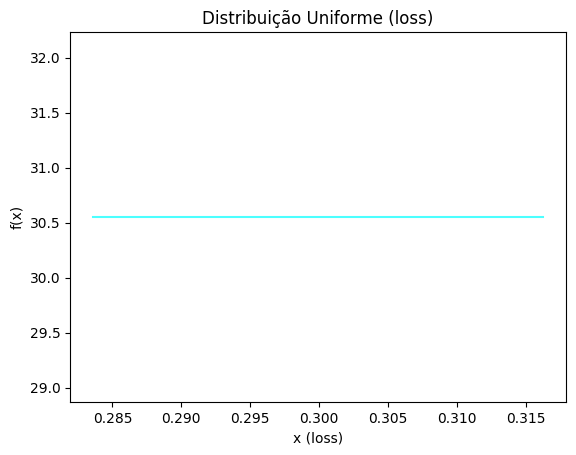

In [6]:
# Parâmetros da distribuição uniforme
a = loss_data['train_loss'].min()
b = loss_data['train_loss'].max()

# Gráfico
x = np.linspace(a, b, 1000)
probs = uniform.pdf(x, loc=a, scale=b-a)

plt.plot(x, probs, color='cyan', alpha=0.7)
plt.title('Distribuição Uniforme (loss)')
plt.xlabel('x (loss)')
plt.ylabel('f(x)')
plt.show()

## 6. Distribuição Exponencial
Modelar o tempo (em épocas) entre perdas consecutivas de validação acima da mediana.

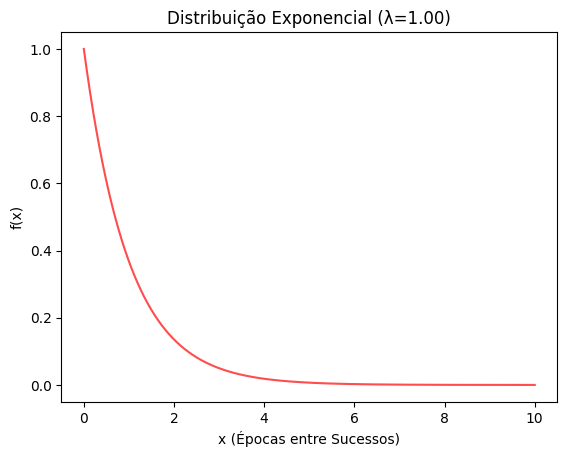

In [7]:
# Calcular intervalos entre sucessos
intervals = np.diff(loss_data[loss_data['val_loss'] > median_val_loss].index)

# Taxa lambda
lambda_ = 1 / intervals.mean()

# Gráfico
x = np.linspace(0, 10, 1000)
probs = expon.pdf(x, scale=1/lambda_)

plt.plot(x, probs, color='red', alpha=0.7)
plt.title(f'Distribuição Exponencial (λ={lambda_:.2f})')
plt.xlabel('x (Épocas entre Sucessos)')
plt.ylabel('f(x)')
plt.show()

## 7. Distribuição Gaussiana (Normal)
Modelar os valores de `loss` como uma distribuição Normal.

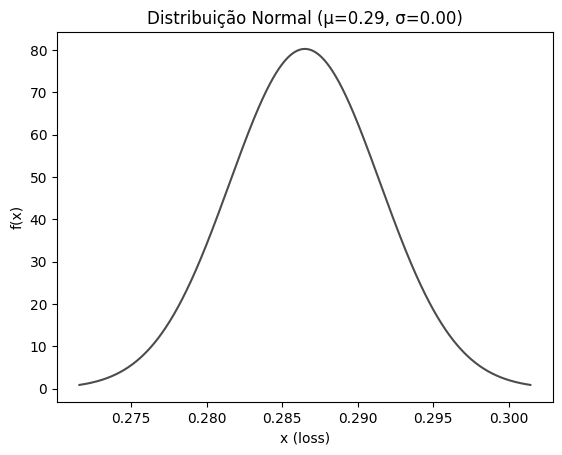

In [8]:
# Parâmetros
mu = loss_data['train_loss'].mean()
sigma = loss_data['train_loss'].std()

# Gráfico
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
probs = norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x, probs, color='black', alpha=0.7)
plt.title(f'Distribuição Normal (μ={mu:.2f}, σ={sigma:.2f})')
plt.xlabel('x (loss)')
plt.ylabel('f(x)')
plt.show()


## Conclusão

Com base nos dados fornecidos, foram geradas distribuições de probabilidade para analisar o comportamento das perdas de treinamento e validação.
